### Primeiramente, o que é uma Regressão Linear?





Em estatística ou econometria, regressão linear é uma equação para se estimar a condicional (valor esperado) de uma variável y, dados os valores de algumas outras variáveis x.


Exemplo de regressão linear.
A regressão, em geral, tem como objectivo tratar de um valor que não se consegue estimar inicialmente.

A regressão linear é chamada "linear" porque se considera que a relação da resposta às variáveis é uma função linear de alguns parâmetros. Os modelos de regressão que não são uma função linear dos parâmetros se chamam modelos de regressão não-linear. Sendo uma das primeiras formas de análise regressiva a ser estudada rigorosamente, é usada extensamente em aplicações práticas. Isso acontece porque modelos que dependem de forma linear dos seus parâmetros desconhecidos, são mais fáceis de ajustar que os modelos não-lineares aos seus parâmetros, e porque as propriedades estatísticas dos estimadores resultantes são fáceis de determinar.

Modelos de regressão linear são frequentemente ajustados usando a abordagem dos mínimos quadrados, mas que também pode ser montada de outras maneiras, tal como minimizando a "falta de ajuste" em alguma outra norma (com menos desvios absolutos de regressão), ou através da minimização de uma penalização da versão dos mínimos quadrados. Por outro lado, a abordagem de mínimos quadrados pode ser utilizado para ajustar a modelos que não são modelos lineares. Assim, embora os termos "mínimos quadrados" e "modelo linear" estejam intimamente ligados, eles não são sinônimos.

### Nosso Dataset

Não é segredo para ninguém que a cerveja é uma das bebidas mais tradicionais e populares no Brasil. 

Em 2015, o ano mais recente para o qual existem estatísticas disponíveis, os checos beberam 142,4 litros por pessoa. Isso é o equivalente a 250 litros - ou um a cada 35 horas. Mas, dado que é improvável que menores de idade contribuam para esse número, é seguro supor que o bebedor de cerveja médio provavelmente consome um pouco mais.


Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde acontecem algumas festas com turmas de alunos de 18 a 28 anos (média). O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo uma Meta, com período de um ano.

### Procedimentos padrões

Iremos realizar os procedimentos padrões, ou seja, importar as bibliotecas e checar nosso dataset.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Consumo_cerveja.csv", sep=';')

In [3]:
df.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


##### Biblioteca
Data - Dia do ano

temp_media - Temperatura média (°C)

temp_min - Temperatura Mínima (°C)

temp_max - Temperatura Máxima (°C)

chuva - Precipitação (mm)

fds - Final de Semana, onde 1 é sim e 0 é não

consumo - Consumo de Cerveja por litros 

In [4]:
df.shape

(365, 7)

In [5]:
df.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de Correlação

Entende-se **coeficiente de correlação** como uma medida de associação linear entre duas variáveis e o mesmo se situa entre -1 e +1. O que isso significa? Quanto mais próximo de -1 quer dizer que os dados não correlacionam entre si, ou seja, enquanto um aumenta, o outro diminui. Mais próximo de +1 quer dizer que ambos dados possuem uma correlação, ou seja, "crescem juntos" digamos assim.

Desta forma, vamos plotar uma **Matriz de Correlação** para ver se conseguimos observar alguma informação desdes dados.

In [6]:
df.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


 Quando observamos Consumo x temp_max e Consumo x Chuva ai sim podemos ver algo interessante. O aumento do consumo aparentemente esta relacionado a maior temperatura, e em contrapartida, em dias chuvosos o consumo tende a cair bastante. 

Quanto ao fim de semana, vemos que o consumo tende a aumentar o consumo.

## Análise Visual

Neste momento iremos realizar uma visualização dos dados. No primeiro momento irei plotar um gráfico de linhas no intuito de observar se possui algo notável dentro da relação Consumo x Dias do ano

Para melhorar a visualização, irei colocar a data do dia como index.

In [7]:
df1 = df
df1.set_index('data',inplace=True)

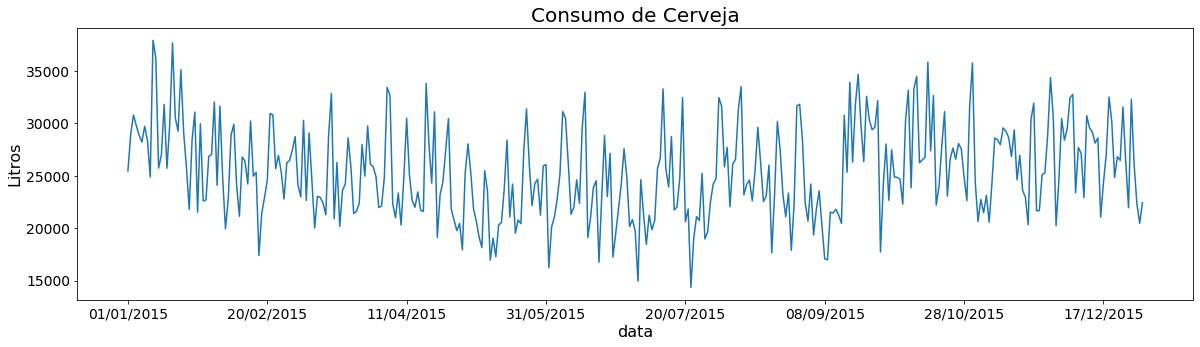

In [8]:
fig, ax = plt.subplots(figsize = (20, 5))


ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias do ano', fontsize=16)
ax = df1['consumo'].plot(fontsize=14)

É possível observar que dos primeiros dias do ano até o meio do ano há uma queda, possivelmente relacionada com o início do Outono/Inverno, que são épocas onde a temperatura tende a diminuir e como vimos anteriormente, o aumento de consumo está relacionado ao aumento de temperatura. Com esse pensamento podemos perceber também um aumento do consumo, do meio do ano em diante, ou seja, quando começa a se aproximar da Primavera/Verão, épocas onde a temperatura tende a ser maior.

## Box Plot

Conforme explicado pelo blog Operdata, o boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados.

Para fazermos a visualização do **Box Plot** iremos importar a biblioteca Searborn.

In [9]:
import seaborn as sns

Text(0, 0.5, 'Litros')

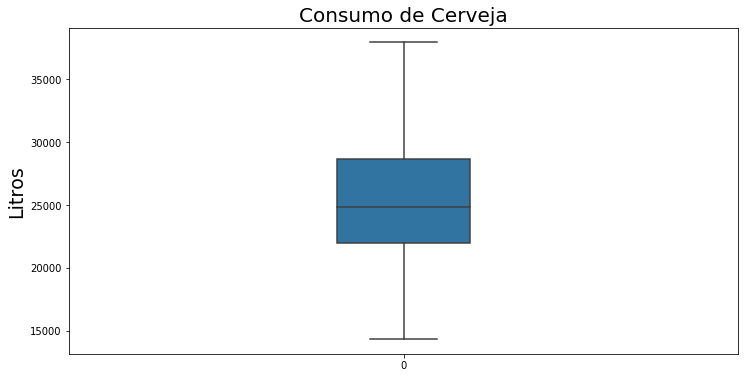

In [10]:
ax = sns.boxplot(data = df['consumo'], orient='v', width=0.2)

ax.figure.set_size_inches(12, 6)
ax.set_title("Consumo de Cerveja", fontsize=20)
ax.set_ylabel("Litros", fontsize=19)

Podemos observar que não tem nenhum outlier visível de fato neste dataset. A mediana que esta "quase" no perfeito, ou seja, esta um pouquinho abaixo do meio certinho do box, mas no geral é um dataset que segue um padrão.

## Analisando duas variáveis

Neste momento irei plotar um boxplot para análisar duas variáveis distintas e suas relações com o consumo de cerveja.

Text(0.5, 0, 'Final de Semana')

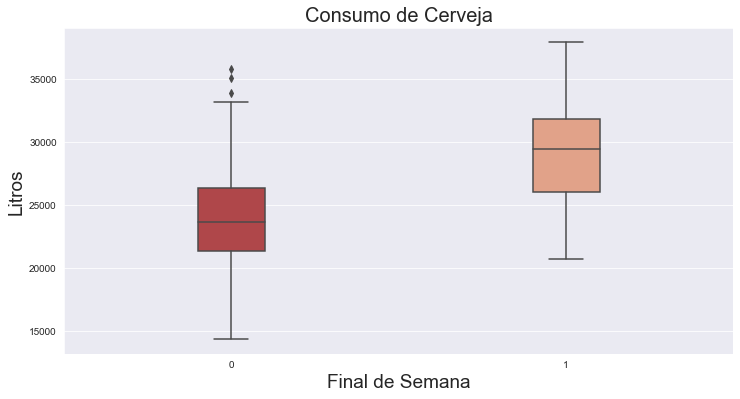

In [11]:
sns.set_palette("RdBu")
sns.set_style("darkgrid")


ax = sns.boxplot(y='consumo', x='fds', data=df1, orient='v', width=0.2)


ax.figure.set_size_inches(12, 6)
ax.set_title("Consumo de Cerveja", fontsize=20)
ax.set_ylabel("Litros", fontsize=19)
ax.set_xlabel("Final de Semana", fontsize=19)

Conforme podemos notar na visualização, o consumo de litros durante a semana, tende a cair bastante com relação ao final de semana. Podemos relacionar isso com dias úteis, ou seja, normalmente as pessoas estão focadas em trabalhar ou estudar durante a semana, e no final de semana tomar sua cervejinha.

É visível também que possuímos em dias da semana alguns picos de alto consumo. Como o Brasil é um país católico e possui muitos feriados, além dos feriados ja tradicionais, existe a possibilidade de algum feriado cair em dia útil e sendo assim pode-se justificar os grandes picos em alguns pontos no dias úteis.

## Distribuição de Frequências

Em estatística, a distribuição de frequência é um arranjo de valores que uma ou mais variáveis tomam em uma amostra. Cada entrada na tabela contém a frequência ou a contagem de ocorrências de valores dentro de um grupo ou intervalo específico, e deste modo, a tabela resume a distribuição dos valores da amostra.

Uma distribuição perfeita teria como base um formato bem parecido com um sino.

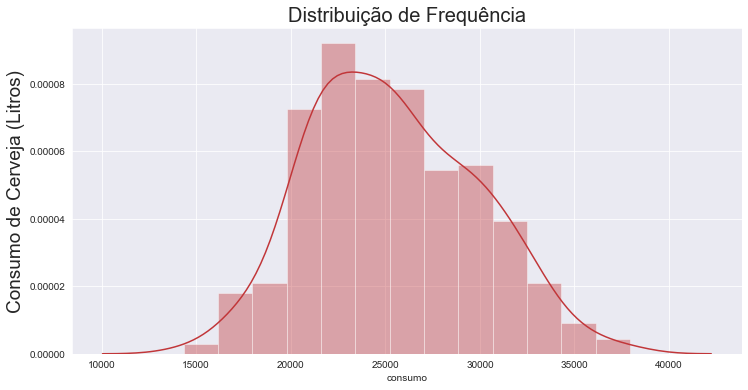

In [12]:
ax = sns.distplot(df1['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de Frequência", fontsize=20)
ax.set_ylabel("Consumo de Cerveja (Litros)", fontsize=19)
ax

## Relação entre variaveis dependentes x variáveis explicativas

Plotamos um scatterplot para visualizar as relações da variável coluna com as demans variáveis.

Veremos que no primeiro momento, com o sns.paiplot(df1) será traçada a relação de todas as colunas, então logo abaixo iremos mostrar um outro método onde é possível plotar apenas com a variável consumo no eixo Y.

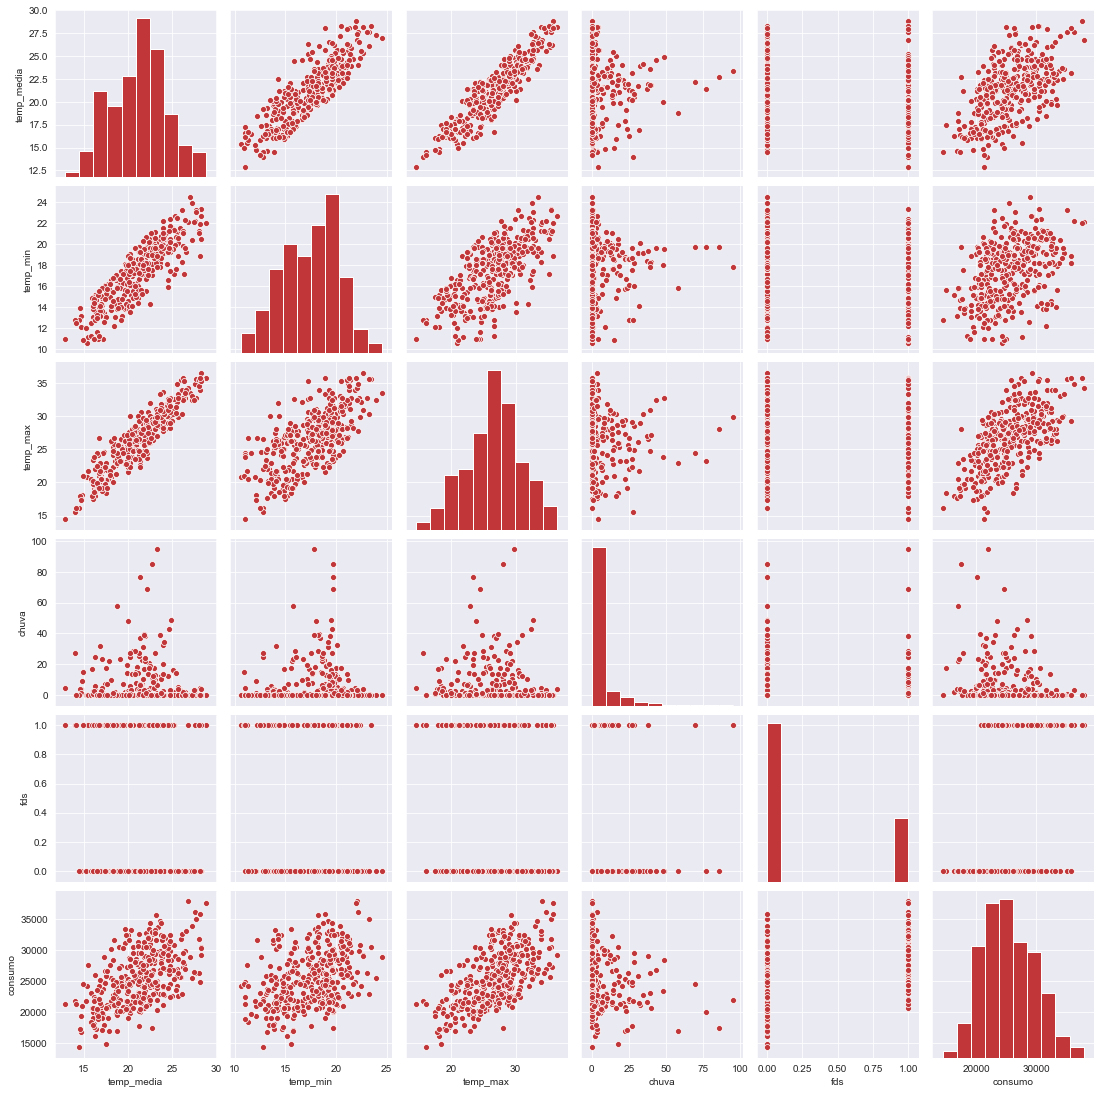

In [13]:
ax = sns.pairplot(df1)

Agora apenas com a variável consumo.

Text(0.5, 1.2, 'Dispersão Consumo x Variáveis')

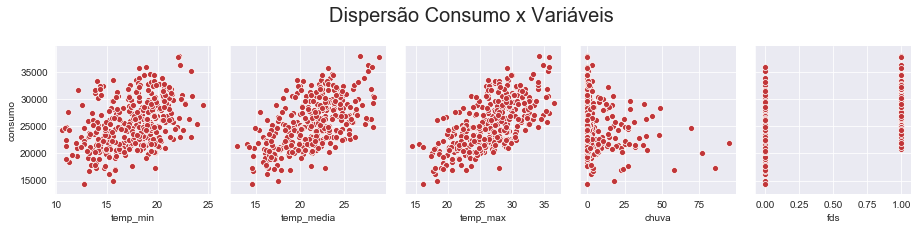

In [14]:
ax = sns.pairplot(df1, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão Consumo x Variáveis', fontsize = 20, y=1.2)

Podemos análisar que em relação a temp_min o consumo de cerveja segue uma linha, é possível perceber um certo padrão, porém quando comparamos com temp_media e principalmente com temp_max ai sim vemos uma grande correlação.

Text(0.5, 1.2, 'Dispersão Consumo x Variáveis')

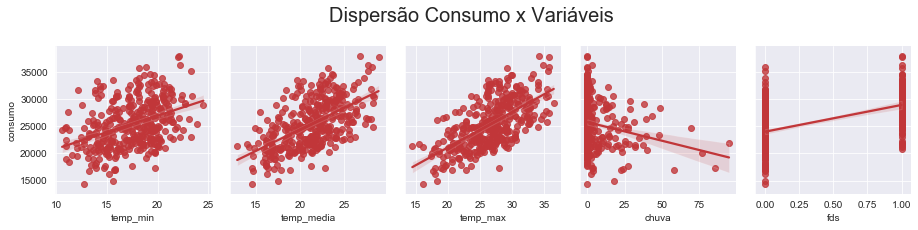

In [15]:
ax = sns.pairplot(df1, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão Consumo x Variáveis', fontsize = 20, y=1.2)

Outra forma de visualizarmos estes dados é através do lmplot

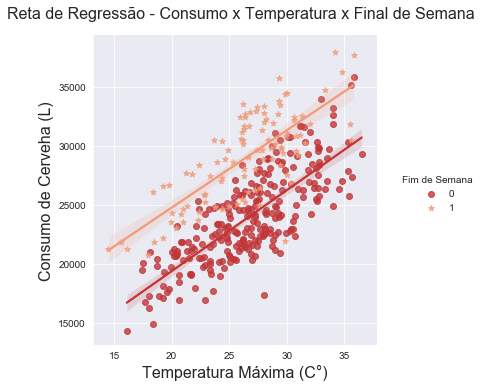

In [16]:
ax = sns.lmplot(x='temp_max', y='consumo', data=df1, hue='fds', markers=['o', '*'], legend = False)
ax.fig.suptitle("Reta de Regressão - Consumo x Temperatura x Final de Semana", fontsize=16, y=1.05)
ax.set_ylabels("Consumo de Cerveha (L)", fontsize=16)
ax.set_xlabels("Temperatura Máxima (C°)", fontsize=16)
ax.add_legend(title="Fim de Semana")
ax

Vamos importar a biblioteca do sklearn

In [17]:
from sklearn.model_selection import train_test_split

Para este momento precisamos separar os dados que serão utilizados como dados de treino e teste no nosso modelo. Basicamente iremos armazenar a variável dependente e as variáveis explicativas.

In [18]:
y = df1['consumo']

In [19]:
X = df1[['temp_max', 'chuva', 'fds']]

Iremos utilizar agora o train_test_split. A função nos retorna 4 valores, então dessa forma devemos organizar de maneira que fique X_train, X_test, y_train, y_test, logo após informaremos onde estão os dados do X e do Y. O test_size é para saber o tamanho do modelo de teste que queremos, utilizaremos 30% para teste. Dessa forma, será pego de forma aleatória 70% dos valores do dataset e estes serão "treinados" pelo modelo. Os 30% que sobraram ficaram para test, uma forma de checarmos a accucaria do modelo. 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

Vamos visualizar se realmente foi feito conforme esperado.

In [21]:
X_train.shape

(255, 3)

In [22]:
X_test.shape

(110, 3)

Vamos agora instanciar a classe da Regressão Linear no Python e o metrics para checarmos as métricas do nosso modelo.

Fazemos a importação do modelo LinearRegression da biblioteca do Sklearn e do Metrics para avaliarmos nosso modelo.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
modelo = LinearRegression()

In [25]:
#Treinando o modelo

modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


Neste caso, iremos utilizar nosso modelo nos nossos dados de teste, ou seja, ver qual é o score do nosso modelo com os dados reais que temos. Para isso criamos o y_previsto.

In [27]:
y_previsto = modelo.predict(X_test)

Basicamente o que foi feito foi: passamos para nosso modelo os dados do X_test para ele fazer uma previsão sobre eles, e o que faremos agora é conferir o quão ele "acertou" usando as respostas verdadeiras, no caso os valores verdadeiros.

In [28]:
# Usamos o %s para puxar como string o que vai vir após o %.
#R² mede o quanto da variação da variável dependente é explicada pelo modelo estimado.

print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


Agora que ja foi estimado o modelo, vamos realizar previsões com o mesmo.

In [29]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
data,,,
06/01/2015,30.5,12.2,0


In [30]:
modelo.predict(entrada)[0]

26094.901775262017

### Simulador simples

In [31]:
temp_max=42.5
chuva=12.2
fds=0
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

34311.74 litros


Irei obter agora o valor do Intercepto do modelo, o intercepto nada mais é que o efeito médio em Y, sem a utilização das demais variáveis do modelo. Para isso, utilizamos o modelo.intercept_.

In [32]:
modelo.intercept_

5951.9763393124595

Ou seja, zerando todas as demais variáveis, o consumo médio seria de 5951 litros de cerveja.

### Coeficiente de regressão

Também conhecidos por "coeficientes parciais de regressão" ou "coeficientes parciais angulares". É obtido por meio do valor médio de Y, com a variação de uma unidade de uma determinada variável X. No caso do nosso projeto, poderíamos utilizar temp_max, por exemplo. A ideia é estudar o efeito direto de uma varíavel em cima de Y.

In [33]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

O que quero agora é colocar todas as variáveis de forma organizada em um dataframe, para questão de melhor visualização e entendimento.
Para isso checo primeiro a ordem das variáveis explicativas em em seguida crio uma lista com os nomes das variáveis do modelo.

In [34]:
#checando a ordem das variáveis
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [35]:
index =['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

In [36]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_), index=index, columns={'Paramêtros'})

,Paramêtros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados


<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

### Análises visuais

Após feita todo checagem em nosso modelo, vamos agora conferir através de análises visuais se precisamos nos preocupar com alguma variável. Se tem algo "muito anormal" ao qual devemos conferir.

In [37]:
y_train_prev = modelo.predict(X_train)

Plotando gráfico de dispersão entre valor estimado e valor real.

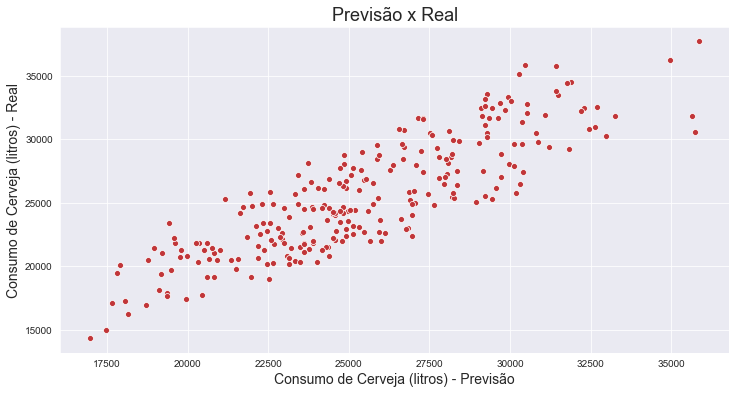

In [38]:
ax = sns.scatterplot(x= y_train_prev, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize = 14)
ax

Podemos observar que o modelo não está tão legal, pois no inicio até observamos os dados "próximos" porém ele vai se abrindo ao mesmo tempo que o valor dos dados aumenta.

### Obter resíduo

Vamos plotar um gráfico de dispersão entre o valor estimado e o resíduo. Isso nada mais é que um método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

In [39]:
residuo = y_train - y_train_prev 

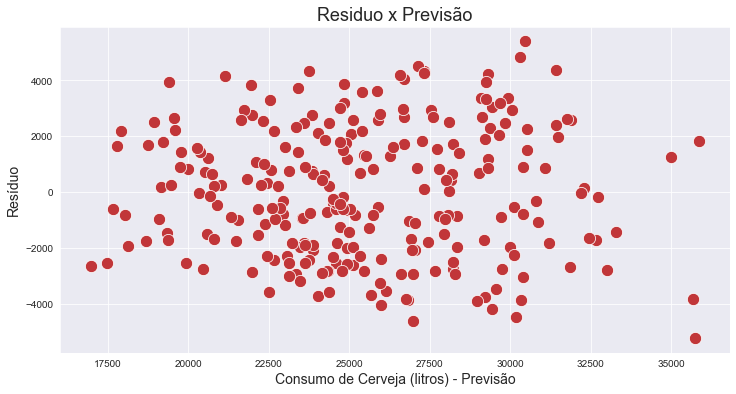

In [40]:
ax = sns.scatterplot(x= y_train_prev, y=residuo, s=150)
ax.figure.set_size_inches(12, 6)
ax.set_title('Residuo x Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduo', fontsize = 14)
ax

## Comparação de Modelos

Normalmente os datasets utilizados por nós cientistas de dados possuem muitas variáveis, e se faz necessário fazer comparativos entre variáveis. Talvez uma variável específica me daria dados melhores do que a variável "temp_max" por  exemplo. 
Então o que farei é meio que "refazer" o modelo com nova variável explicativa.

In [41]:
X2 = df[['temp_media', 'chuva', 'fds']]

Basicamente irei repetir os procedimentos anteriores.

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [43]:
modelo_2 = LinearRegression()

In [44]:
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Observando o comparativo:

In [45]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [46]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [47]:
y_previ = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [48]:
print("O modelo R² com temperatura média é: ")
print('R² = %s' % metrics.r2_score(y2_test, y_previsto_2).round(2))

O modelo R² com temperatura média é: 
R² = 0.66


In [49]:
print("O modelo R² com temperatura máxima é: ")
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

O modelo R² com temperatura máxima é: 
R² = 0.69


Notamos que estão mais próximos, porém ainda sim o modelo com temperatura Máxima possuem uma melhor previsão.